# ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime
%matplotlib inline

In [2]:
Frvids = pd.read_csv('FRvideos_Clean.csv')
Frvids = Frvids.drop(columns=['Unnamed: 0'])

In [3]:
Frvids['trending_date'] = pd.to_datetime(Frvids['trending_date'])
Frvids['publish_time'] = pd.to_datetime(Frvids['publish_time'])
#Frvids = Frvids.set_index(Frvids['trending_date'])

In [13]:
Frvids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category_title
0,Ro6eob0LrCY,2017-11-14,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,...,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243),Entertainment
1,Yo84eqYwP98,2017-11-14,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-12-11,[none],432721,14053,576,...,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Corse,41.927065,8.728294,POINT (8.728293821999999 41.92706484),Entertainment
2,WuTFI5qftCE,2017-11-14,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-12-11,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,...,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Moyotte,-12.787089,45.275004,POINT (45.27500362 -12.78708901),Gaming
3,ee6OFs8TdEg,2017-11-14,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,...,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755),Sports
4,teXaL6GdQRk,2017-11-14,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,...,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...,Martinique,14.610412,-61.080029,POINT (-61.08002914 14.6104118),Comedy


In [5]:
Frvids['trending_date'].value_counts()

2017-12-16    189
2017-07-12    188
2017-11-17    185
2018-12-01    185
2018-04-21    185
             ... 
2018-04-25    163
2018-03-04    163
2018-05-20    151
2018-05-17    149
2018-10-06    141
Name: trending_date, Length: 205, dtype: int64

## Videos tendencia con el tiempo

Text(0.5, 1.0, 'Distribucion de videos tendencia con el tiempo')

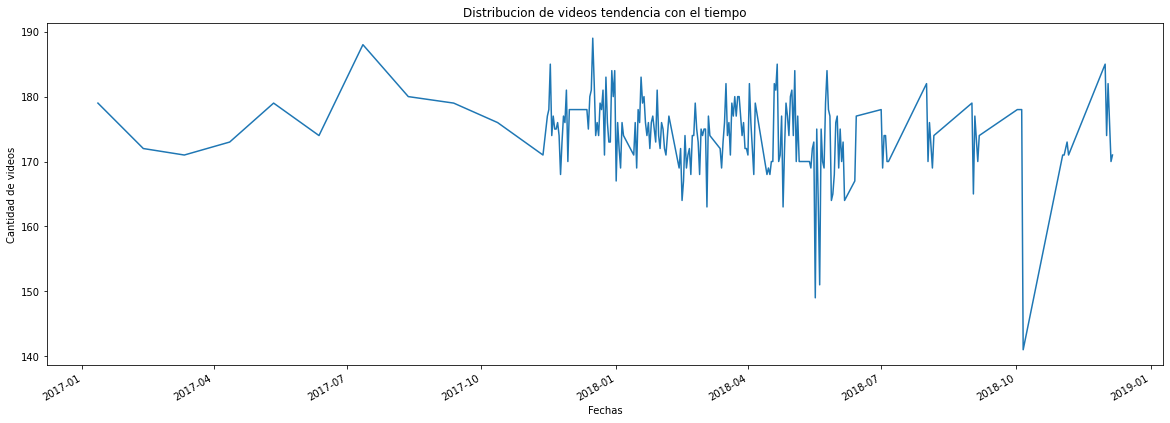

In [6]:
plt.figure(figsize=(20, 7))
Frvids.groupby(Frvids['trending_date'].rename('Fechas')).size().plot()
plt.ylabel("Cantidad de videos")
plt.title("Distribucion de videos tendencia con el tiempo")

## Solo 2018

C:\Users\Sebastian\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Fechas'>

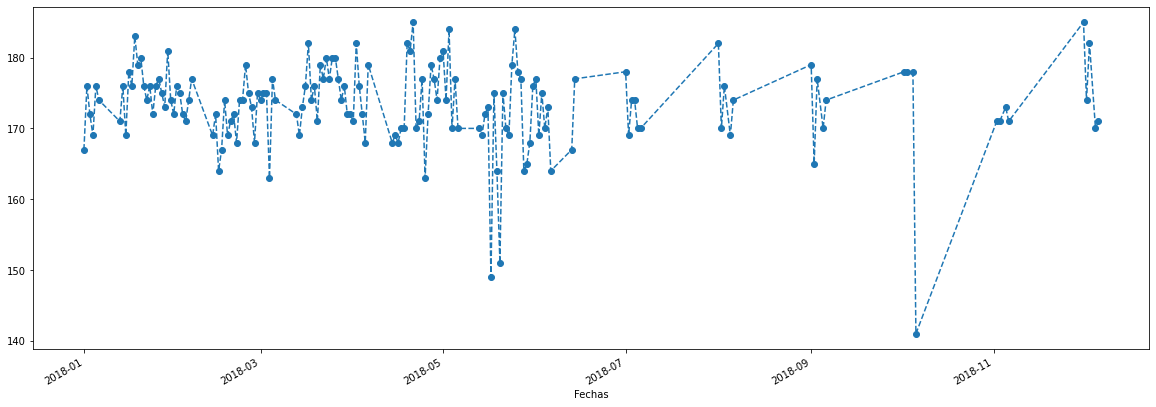

In [24]:
d1 = datetime.datetime(2017, 12, 31)
Fplot = Frvids[Frvids['trending_date']>d]
Fplot['trending_date'] = pd.to_datetime(Fplot['trending_date'])
plt.figure(figsize=(20, 7))
Fplot.groupby(Fplot['trending_date'].rename('Fechas')).size().plot(marker='o', linestyle='--')

## Videos tendencia por mes

Text(0.5, 1.0, 'Distribucion de videos tendencia por mes')

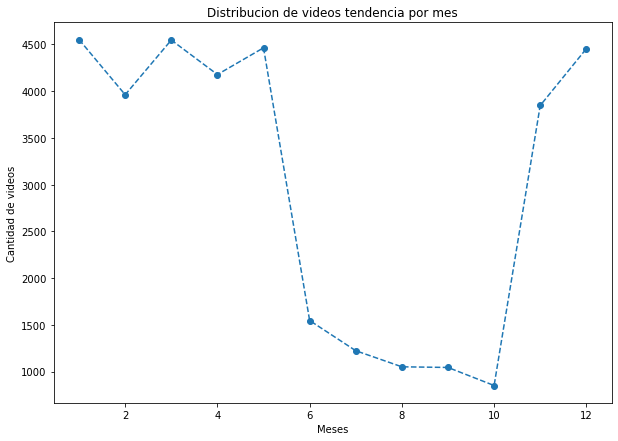

In [7]:
plt.figure(figsize=(10, 7))
Frvids.groupby(Frvids['trending_date'].rename('Meses').dt.month).size().plot(marker='o', linestyle='--')
plt.ylabel("Cantidad de videos")
plt.title("Distribucion de videos tendencia por mes")